In [53]:
# HeartPal 
# HeartPal is a health application that leverages wearable technology and predictive analytics to help users monitor cardiovascular health. 
# Business question: 
# Which lifestyle and demographic factors most strongly influence the likelihood of heart disease? 

In [55]:
# UCI Heart Disease installation and importing of libraries to assist with data exploration/manipulation 
!pip install ucimlrepo

import pandas as pd
from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

# metadata
print(heart_disease.metadata)

pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', 200)  # Expand display width
pd.set_option('display.max_rows', None)  # Show all rows (if needed)

print(heart_disease.variables)

hd = X.join(y['num'])

print(hd.info())

{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

In [56]:
# Shows the top row of the dataset
print(hd.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope   ca  thal  num
0   63    1   1       145   233    1        2      150      0      2.3      3  0.0   6.0    0
1   67    1   4       160   286    0        2      108      1      1.5      2  3.0   3.0    2
2   67    1   4       120   229    0        2      129      1      2.6      2  2.0   7.0    1
3   37    1   3       130   250    0        0      187      0      3.5      3  0.0   3.0    0
4   41    0   2       130   204    0        2      172      0      1.4      1  0.0   3.0    0


In [57]:
#checkin for missing values
print(hd.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64


In [58]:
#missing values percentage
missing_percentage = hd.isnull().sum() / len(hd) * 100
print(missing_percentage)

age         0.000000
sex         0.000000
cp          0.000000
trestbps    0.000000
chol        0.000000
fbs         0.000000
restecg     0.000000
thalach     0.000000
exang       0.000000
oldpeak     0.000000
slope       0.000000
ca          1.320132
thal        0.660066
num         0.000000
dtype: float64


In [59]:
# Fill missing values with the mean of the respective columns
hd['ca'].fillna(hd['ca'].mean(), inplace=True)
hd['thal'].fillna(hd['thal'].mean(), inplace=True)

# Verify if there are any missing values left
print(hd.isnull().sum())


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19960\1386628066.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hd['ca'].fillna(hd['ca'].mean(), inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19960\1386628066.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [60]:
missing_percentage = hd.isnull().sum() / len(hd) * 100
print(missing_percentage)

age         0.0
sex         0.0
cp          0.0
trestbps    0.0
chol        0.0
fbs         0.0
restecg     0.0
thalach     0.0
exang       0.0
oldpeak     0.0
slope       0.0
ca          0.0
thal        0.0
num         0.0
dtype: float64


In [61]:
# Data exploration for understanding the dataset
print(hd.describe())

              age         sex          cp    trestbps        chol         fbs     restecg     thalach       exang     oldpeak       slope          ca        thal         num
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515    0.990099  149.607261    0.326733    1.039604    1.600660    0.672241    4.734219    0.937294
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356198    0.994971   22.875003    0.469794    1.161075    0.616226    0.931209    1.933272    1.228536
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000    0.000000   71.000000    0.000000    0.000000    1.000000    0.000000    3.000000    0.000000
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000    0.000000  133.500000    0.000000    0.000000    1

In [62]:
# Counts duplicate rows
print(hd.duplicated().sum()) 

0


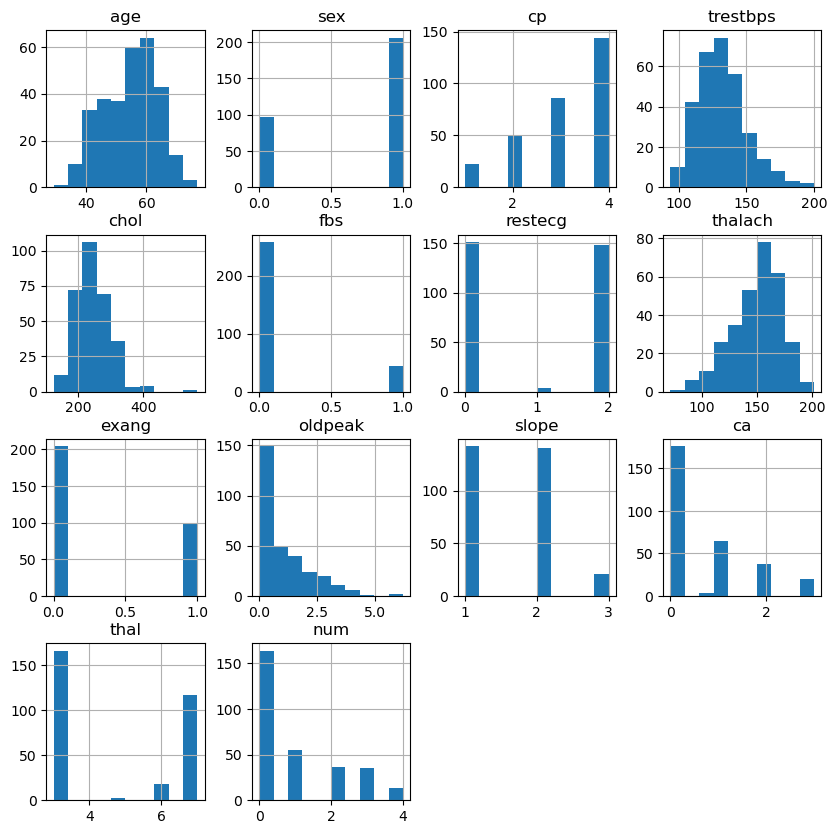

In [63]:
#visulization to understand the distribution of the data in various columns
import matplotlib.pyplot as plt

hd.hist(figsize=(10, 10))  # Plot histograms for numerical columns
plt.show()


In [64]:
#correlation 
correlation_matrix = hd.corr()  # Compute correlation matrix
print(correlation_matrix)  # Print it

               age       sex        cp  trestbps      chol       fbs   restecg   thalach     exang   oldpeak     slope        ca      thal       num
age       1.000000 -0.097542  0.104139  0.284946  0.208950  0.118530  0.148868 -0.393806  0.091661  0.203805  0.161770  0.359489  0.127368  0.222853
sex      -0.097542  1.000000  0.010084 -0.064456 -0.199915  0.047862  0.021647 -0.048663  0.146201  0.102173  0.037533  0.092891  0.379300  0.224469
cp        0.104139  0.010084  1.000000 -0.036077  0.072319 -0.039975  0.067505 -0.334422  0.384060  0.202277  0.152050  0.232332  0.264895  0.407075
trestbps  0.284946 -0.064456 -0.036077  1.000000  0.130120  0.175340  0.146560 -0.045351  0.064762  0.189171  0.117382  0.098707  0.133534  0.157754
chol      0.208950 -0.199915  0.072319  0.130120  1.000000  0.009841  0.171043 -0.003432  0.061310  0.046564 -0.004062  0.118525  0.014190  0.070909
fbs       0.118530  0.047862 -0.039975  0.175340  0.009841  1.000000  0.069564 -0.007854  0.025665  0.0057

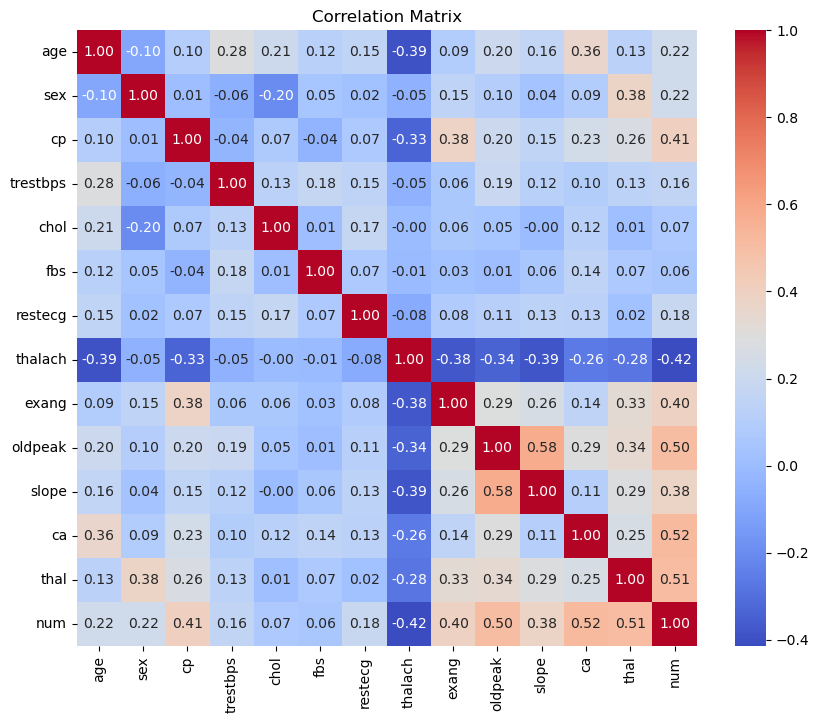

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(hd.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [66]:
#checking the data types 
print(hd.dtypes)

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca          float64
thal        float64
num           int64
dtype: object


In [67]:
# Dropping thal as it is not relevent to the question
hd = hd.drop(columns=[col for col in hd.columns if 'thal' in col], errors='ignore')

In [68]:
# dropping slope and restecg as they are not relevent to the question
hd = hd.drop(columns=['slope', 'restecg'], errors='ignore')

In [69]:
hd = pd.get_dummies(hd, columns=['cp'], drop_first=True)

In [70]:
hd

,age,sex,trestbps,chol,fbs,exang,oldpeak,ca,num,cp_2,cp_3,cp_4
0,63,1,145,233,1,0,2.3,0.000000,0,False,False,False
1,67,1,160,286,0,1,1.5,3.000000,2,False,False,True
2,67,1,120,229,0,1,2.6,2.000000,1,False,False,True
3,37,1,130,250,0,0,3.5,0.000000,0,False,True,False
4,41,0,130,204,0,0,1.4,0.000000,0,True,False,False
5,56,1,120,236,0,0,0.8,0.000000,0,True,False,False
6,62,0,140,268,0,0,3.6,2.000000,3,False,False,True
7,57,0,120,354,0,1,0.6,0.000000,0,False,False,True
8,63,1,130,254,0,0,1.4,1.000000,2,False,False,True
9,53,1,140,203,1,1,3.1,0.000000,1,False,False,True


In [71]:
#converting cp bool into integers to ensure consistency across all numeric columns
hd[['cp_2', 'cp_3', 'cp_4']] = hd[['cp_2', 'cp_3', 'cp_4']].astype(int)

In [72]:
#dropping ca as it is not relevent to the question
hd = hd.drop(columns=['ca'], errors='ignore')

In [73]:
#checking the data types for updated columns 
print(hd.dtypes)

age           int64
sex           int64
trestbps      int64
chol          int64
fbs           int64
exang         int64
oldpeak     float64
num           int64
cp_2          int32
cp_3          int32
cp_4          int32
dtype: object


In [76]:
# checking for different values
print(hd['num'].value_counts())

num
0    164
1     55
2     36
3     35
4     13
Name: count, dtype: int64


In [82]:
# since the target column has 5 values we need to convert it into 0 and 1 (binary classification)
hd['num'] = hd['num'].apply(lambda x: 1 if x > 0 else 0)
print(hd['num'].value_counts())

num
0    164
1    139
Name: count, dtype: int64


In [84]:
# The KeyError indicates that 'thal' column does not exist in the DataFrame `hd` when trying to convert it to integers or create dummy variables.
# However, earlier in the preprocess steps, we already converted 'thal' and 'ca' into dummies and dropped the original columns.
# Thus, any subsequent reference to 'thal' and 'ca' will throw an error. We must adjust the code and remove redundant steps.

# Fixed Code

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define features and target variable without redundant conversion
X = hd.drop('num', axis=1)
y = hd['num']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.7540983606557377
Confusion Matrix:
[[22  7]
 [ 8 24]]
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.76      0.75        29
           1       0.77      0.75      0.76        32

    accuracy                           0.75        61
   macro avg       0.75      0.75      0.75        61
weighted avg       0.75      0.75      0.75        61



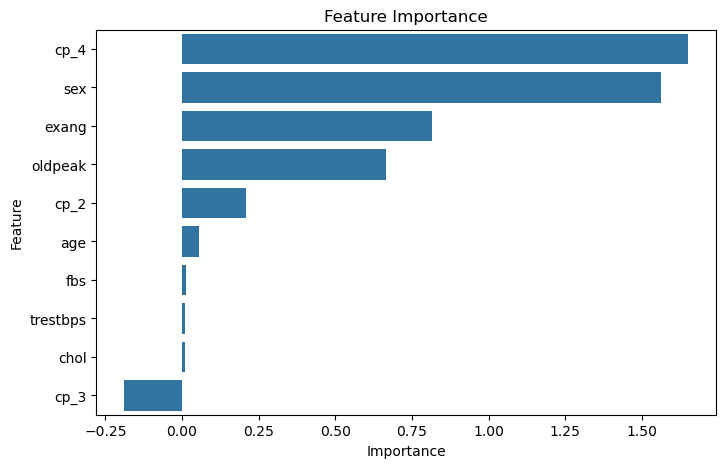

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you're using a model with coef_ (e.g., Logistic Regression)
feature_importance = model.coef_[0]
features = hd.columns.drop('num')  # Drop target variable
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title("Feature Importance")
plt.show()

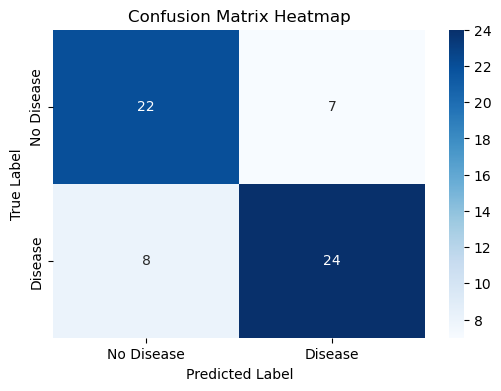

In [86]:
#Visualizing the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

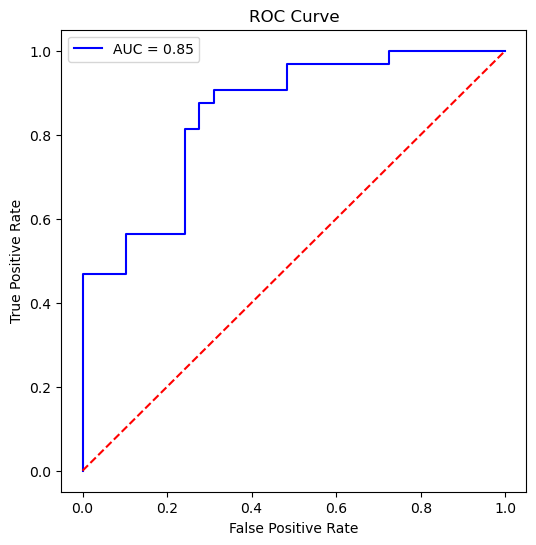

In [87]:
# visualization oof accuracy and ROC curve
from sklearn.metrics import roc_curve, auc

y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for class 1
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}', color='blue')
plt.plot([0,1], [0,1], 'r--')  # Random guessing line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
